# Healthcare-Stroke Prediction

### Appendix
- Click on the links:

>1.   <a href=#intro>Intro</a>
>2.   <a href=#imports>Impots</a>
>3.   <a href=#load>Load Data</a>
>4.   <a href=#Formating>Data Formating</a>
>5.   <a href=#EDA1>Exploratory Data Analysis(uin-variable)</a>
>6.   <a href=#split>Splitting Data</a>
>7.   <a href=#baseline>Modeling And Evaluation</a>





###   <a name='intro'>Domain Background:</a>
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relevant information about the patient.
 
###   <a name='intro'>Data Description:</a>
The original source for this data is <a href="https://www.kaggle.com/godfatherfigure/healthcare-dataset-stroke-data" title="Go https://www.kaggle.com/godfatherfigure/healthcare-dataset-stroke-data">here</a>, and we have taken from kaggel . This data set is name as healthcare-dataset-stroke-data contain 12 column and 5111 rows.

###  <a name='intro'>featuers:</a>
1)  id: unique identifier

2)  gender: "Male", "Female" or "Other"

3)  age: age of the patient 

4)  hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension 

5)  heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6)  ever_married: "No" or "Yes" 

7)  work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8)  Residence_type: "Rural" or "Urban" 

9)  avg_glucose_level: average glucose level in blood 

10) bmi: body mass index 

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"* 

12) stroke: 1 if the patient had a stroke or 0 if not 

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

###   <a name='intro'>Tools:</a>
The main technologies and libraries that will be used are:

Technologies:
1.	Python
2.	Jupyter Notebook
3.	HTML/CS

Libraries:
1.	Pandas
2.	BeautifulSoup
3.	Matplotlib
4.	Seaborn
5.	Numpy 
6.	Sklearn



##   <a name='imports'>Libraries Imports:</a>

In [52]:
print ("Importing.....end",end="",flush=True)

#General Libraries
import numpy as np
import pandas as pd 

# Statistic & Machine Learning Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix, classification_report, make_scorer
from sklearn.metrics import roc_curve, auc
from imblearn import under_sampling, over_sampling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from xgboost import XGBClassifier
from imblearn.over_sampling import RandomOverSampler,SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Data Visualiztion Libraries
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

from warnings import filterwarnings
filterwarnings('ignore')



Importing.....end

In [2]:

#def eval_classification(model, pred, xtrain, ytrain, xval, yval,bta =2):
    #print("Accuracy (val Set): %.2f" % accuracy_score(yval, pred))
    #print("Precision (val Set): %.2f" % precision_score(yval, pred))
    #print("Recall (val Set): %.2f" % recall_score(yval, pred))
    #print("F1-Score (val Set): %.2f" % f1_score(yval, pred, beta= bta))
    
    #fpr, tpr, thresholds = roc_curve(yval, pred, pos_label=1) # pos_label: label yang kita anggap positive
    #print("AUC: %.2f" % auc(fpr, tpr))
def eval_classification(mdl_local, X_local, y_local, bta =3):
    y_pred = mdl_local.predict(X_local)
    print(f"F({bta}):", fbeta_score(y_local, y_pred, beta= bta))
    print("Precision :", precision_score(y_local, y_pred))
    print("Recall :", recall_score(y_local, y_pred))
    
def make_confusion_matrix(model, X_local, y_local, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (model.predict(X_test) does this automatically with a threshold of 0.5)
    y_predict = (model.predict_proba(X_local)[:, 1] >= threshold)
    fraud_confusion = confusion_matrix(y_local, y_predict)
    plt.figure(dpi=80)
    sns.heatmap(fraud_confusion, cmap="Greens", annot=True, square=True, fmt='d',
           xticklabels=['not_stroke', 'had_stroke'],
           yticklabels=['not_stroke', 'had_stroke']);
    plt.xlabel('prediction')
    plt.ylabel('actual')

 ##  <a name='load'>Load Data:</a>

In [3]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


##  <a name='Formating'>Data Formating</a>

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df[df.duplicated()].head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [6]:
for col in df.columns.to_list():
    num_uniq = df[col].nunique()
    if num_uniq <= 10:
        uniq_list = df[col].unique()
    else:
        uniq_list = "more than 10"
    print(col, ":", num_uniq, ",", uniq_list)

id : 5110 , more than 10
gender : 3 , ['Male' 'Female' 'Other']
age : 104 , more than 10
hypertension : 2 , [0 1]
heart_disease : 2 , [1 0]
ever_married : 2 , ['Yes' 'No']
work_type : 5 , ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type : 2 , ['Urban' 'Rural']
avg_glucose_level : 3979 , more than 10
bmi : 418 , more than 10
smoking_status : 4 , ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
stroke : 2 , [1 0]


In [7]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
df= df.drop(["id","work_type","Residence_type"], axis=1)


##  <a name='EDA1'>Exploratory Data Analysis</a>

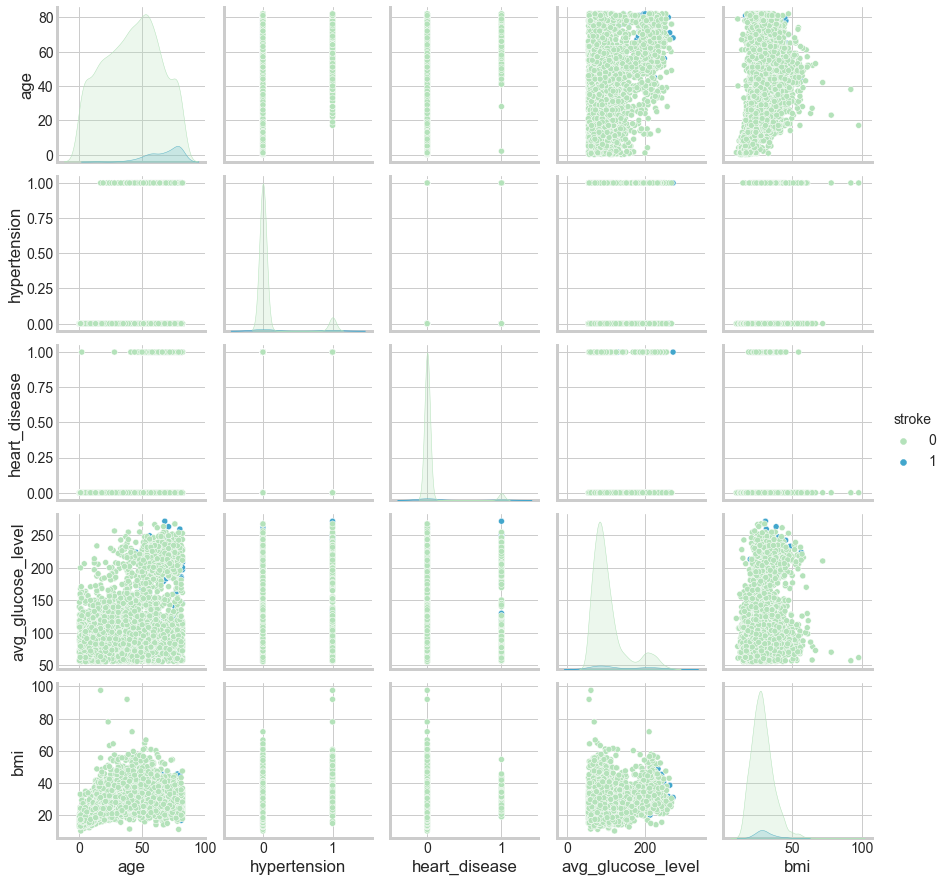

In [68]:
sns.set_style("whitegrid")
sns.pairplot(df, hue='stroke', palette="GnBu");    #GnBu_r  ,GnBu  viridis_r  YlGn_r


In [12]:
corr_matrix = df.corr()
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936
bmi,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000


<AxesSubplot:>

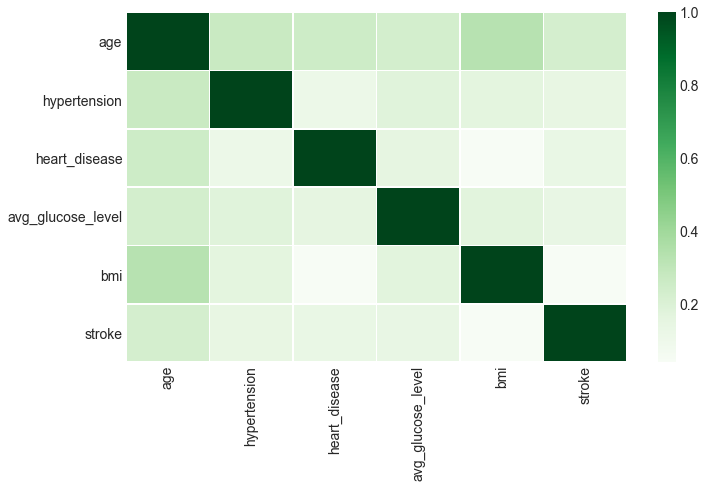

In [69]:
plt.figure(figsize=(10,6))
#sns.heatmap(corr_matrix)
sns.set_style("whitegrid")
sns.heatmap(corr_matrix,linewidths=.5, cmap="Greens")  #PuBuGn_r
#ax = sns.heatmap(flights, cmap="YlGnBu")


#  <a name='split'>Splitting Data</a>

## Create x,y:

In [14]:
X=df.drop("stroke",axis=1)
y=df.stroke

In [15]:
# Build our feature list for cat. and numeric
num_list = X.select_dtypes(include=np.number).columns
cat_list = X.select_dtypes(exclude=np.number).columns
print(num_list, cat_list)

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi'], dtype='object') Index(['gender', 'ever_married', 'smoking_status'], dtype='object')


## Dummy creation:


In [16]:
# Dummy creation
X = pd.get_dummies(X, drop_first=True)


## Spilit Data( train_set, val_set, test_set):

In [18]:
#spilit data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state = 10,stratify=y)
#X_train, X_val, y_train, y_val = train_test_split(X_train_val,y_train_val, test_size = 0.15, random_state =10,stratify=y)

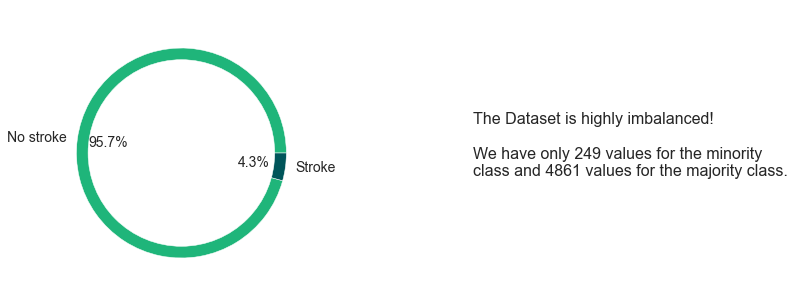

In [94]:
fig = plt.figure(figsize=(12,5),facecolor='#ffffff',)
axes = plt.subplot2grid((1,1),(0,0))
plt.pie(x = [y_train.value_counts()[0], y_train.value_counts()[1]],
        pctdistance=0.70,labels = ['No stroke','Stroke'], autopct='%1.1f%%',
        colors = ['#1fb57a','#00555a'], labeldistance= 1.1, radius = 0.9,)

centre_circle = plt.Circle((0,0),0.8,fc='white') 

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.text(2.5,-0.2,'The Dataset is highly imbalanced!\n\nWe have only 249 values for the minority \nclass and 4861 values for the majority class.', fontsize=16)
plt.show()

In [19]:
#sampling data by RandomUnderSampler or SMOTE or RandomOverSampler
X_under, y_under = under_sampling.RandomUnderSampler(0.5).fit_resample(X_train, y_train)
X_under_s, y_under_s = over_sampling.SMOTE().fit_resample(X_under, y_under)
X_over, y_over = over_sampling.RandomOverSampler(0.5).fit_resample(X_train, y_train)
X_over_SMOTE, y_over_SMOTE = over_sampling.SMOTE().fit_resample(X_train, y_train)

In [91]:
print('Original')
print(pd.Series(y).value_counts())
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
0    4700
1     209
Name: stroke, dtype: int64
UNDERSAMPLING
0    334
1    167
Name: stroke, dtype: int64
OVERSAMPLING
0    3760
1    1880
Name: stroke, dtype: int64
SMOTE
0    3760
1    3760
Name: stroke, dtype: int64


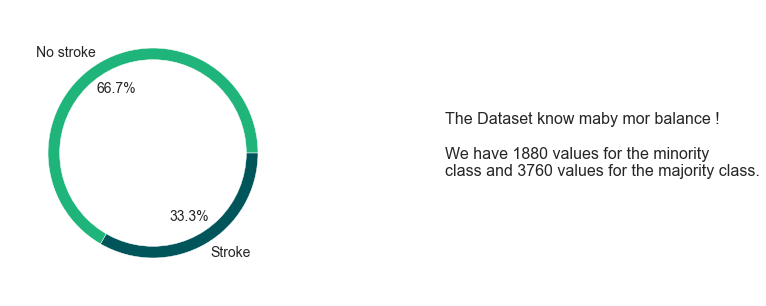

In [92]:
fig = plt.figure(figsize=(12,5),facecolor='#ffffff',)
axes = plt.subplot2grid((1,1),(0,0))

plt.pie(x = [y_over.value_counts()[0], y_over.value_counts()[1]],
        pctdistance=0.70,labels = ['No stroke','Stroke'], autopct='%1.1f%%',
        colors = ['#1fb57a','#00555a'], labeldistance= 1.1, radius = 0.9,)

centre_circle = plt.Circle((0,0),0.8,fc='white') 

fig = plt.gcf()
fig.gca().add_artist(centre_circle)
# plt.tight_layout()
plt.text(2.5,-0.2,'The Dataset know maby mor balance !\n\nWe have 1880 values for the minority \nclass and 3760 values for the majority class.',fontsize=16)
 
plt.show()

 ##   <a name='baseline'>1) Baseline Modle Logistic Regression (LR)</a>

 #### <h2 style="color:red;">Expr0: Logistic Regression with numerical cols <h2>

In [22]:
#Logistic Regression with numerical cols 
lr = LogisticRegression(random_state=10)
lr.fit(X_over[num_list],y_over)
print(str(lr)+' '+'EVALUATION')

y_pred = lr.predict(X_val[num_list])
eval_classification(lr,X_val[num_list], y_val)
print('Train score: ' + str(lr.score(X_over[num_list], y_over)))
print('val score:' + str(lr.score(X_val[num_list], y_val)))

LogisticRegression(random_state=10) EVALUATION
F(3): 0.4593639575971732
Precision : 0.13829787234042554
Recall : 0.6190476190476191
Train score: 0.7840425531914894
val score:0.8187372708757638


 #### <h2 style="color:red;">Expr1: Logistic Regression with all the data (dummy included)<h2>

In [23]:
#Logistic Regression with all the data (dummy included)
lr1 = LogisticRegression(random_state=10)
lr1.fit(X_over,y_over)
print(str(lr1)+' '+'EVALUATION')

y_pred = lr1.predict(X_val)
eval_classification(lr1, X_val, y_val)
print('Train score: ' + str(lr1.score(X_over, y_over)))
print('val score:' + str(lr1.score(X_val, y_val)))

LogisticRegression(random_state=10) EVALUATION
F(3): 0.43554006968641107
Precision : 0.12755102040816327
Recall : 0.5952380952380952
Train score: 0.7769503546099291
val score:0.8085539714867617


#### <h2 style="color:red;">Expr2: With scaling (standard scaler)<h2/>

In [24]:
ss = StandardScaler()

X_over_std = ss.fit_transform(X_over)
X_val_std = ss.transform(X_val)

# Modeling

lr = LogisticRegression(random_state=10)
lr.fit(X_over_std,y_over)
print(str(lr)+' '+'EVALUATION')

y_pred = lr.predict(X_val_std)
eval_classification(lr, X_val_std, y_val)
print('Train score: ' + str(lr.score(X_over_std, y_over)))
print('val score:' + str(lr.score(X_val_std, y_val)))


LogisticRegression(random_state=10) EVALUATION
F(3): 0.45060658578856155
Precision : 0.1306532663316583
Recall : 0.6190476190476191
Train score: 0.7808510638297872
val score:0.8075356415478615


####  <h2 style="color:red;"> Expr3: With pipeline GridSearchCV<h2/>

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
ftwo_scorer = make_scorer(fbeta_score, beta=3)
OVER = over_sampling.RandomOverSampler(0.5 , random_state = 10)
pipeline = Pipeline([('over', OVER), ('lr', LogisticRegression())])

parms = {"lr__penalty":['l2','l1'],"lr__C" : np.arange(0.1,100,0.2),"lr__fit_intercept":[True, False]}

#custom_scorer = make_scorer(fbeta_score, beta=1)

gs_cv = GridSearchCV(pipeline, param_grid = parms, n_jobs=-1, cv=10, verbose=10,scoring=ftwo_scorer)
gs_cv.fit(X_train, y_train)

Fitting 10 folds for each of 2000 candidates, totalling 20000 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=10,
                                                          sampling_strategy=0.5)),
                                       ('lr', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'lr__C': array([ 0.1,  0.3,  0.5,  0.7,  0.9,  1.1,  1.3,  1.5,  1.7,  1.9,  2.1,
        2.3,  2.5,  2.7,  2.9,  3.1,  3.3,  3.5,  3.7,  3.9,  4.1,  4.3,
        4.5,  4.7,  4.9,  5.1,  5.3,  5.5,  5.7,  5.9,  6.1,  6.3,  6.5,
        6.7,  6.9,  7.1,  7.3,  7.5,  7.7,  7.9,  8.1,  8.3,  8.5,...
       90.3, 90.5, 90.7, 90.9, 91.1, 91.3, 91.5, 91.7, 91.9, 92.1, 92.3,
       92.5, 92.7, 92.9, 93.1, 93.3, 93.5, 93.7, 93.9, 94.1, 94.3, 94.5,
       94.7, 94.9, 95.1, 95.3, 95.5, 95.7, 95.9, 96.1, 96.3, 96.5, 96.7,
       96.9, 97.1, 97.3, 97.5, 97.7, 97.9, 98.1, 98.3, 98.5, 98.7, 98.9,
       99.1, 99.3, 99.5, 99.7, 99.9]),
                         

In [26]:
gs_cv.best_score_

0.49925553306032705

In [27]:
gs_cv.best_params_

{'lr__C': 77.10000000000001, 'lr__fit_intercept': True, 'lr__penalty': 'l2'}

In [28]:
lr_final = gs_cv.best_estimator_

In [102]:
#print(lr_final.score(X_train, y_train))
#print(lr_final.score(X_val,y_val)) 
print('Train score: ' + str(lr_final.score(X_train, y_train)))
print('val score:' + str(lr_final.score(X_val,y_val)))
eval_classification(lr_final, X_val, y_val)

Train score: 0.8416093710211358
val score:0.8156822810590632
F(3): 0.4728546409807356
Precision : 0.13989637305699482
Recall : 0.6428571428571429


<Figure size 864x360 with 0 Axes>

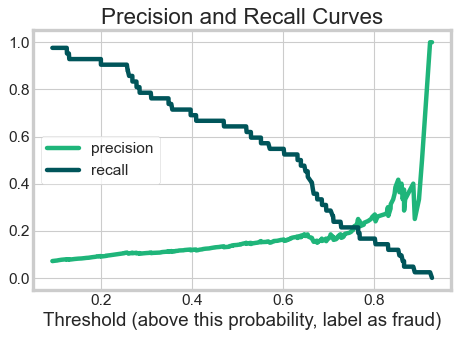

In [103]:
precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_val,lr_final.predict_proba(X_val)[:,1] )
fig = plt.figure(figsize=(12,5),facecolor='#ffffff')

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision',color='#1fb57a')
plt.plot(threshold_curve, recall_curve[1:], label='recall',color='#00555a')
plt.legend(loc='center left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

  ##   <a name='secondmodel'>2) Modle KNeighborsClassifier: </a>

In [31]:
#KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(X_over, y_over)
print(str(kn)+' '+'EVALUATION')

y_pred = kn.predict(X_val)
eval_classification(kn, X_val, y_val)
print('Train score: ' + str(kn.score(X_over, y_over)))
print('val score:' + str(kn.score(X_val, y_val)))

KNeighborsClassifier() EVALUATION
F(3): 0.24291497975708506
Precision : 0.10344827586206896
Recall : 0.2857142857142857
Train score: 0.9524822695035461
val score:0.8635437881873728


####  <h2 style="color:red;"> Expr1: With pipeline GridSearchCV<h2/>

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
ftwo_scorer = make_scorer(fbeta_score, beta=3)

OVER = over_sampling.RandomOverSampler(0.5 , random_state = 10)
pipeline = Pipeline([('over', OVER), ('kn', KNeighborsClassifier())])

prams ={'kn__n_neighbors':[3,7,9,11]}

custom_scorer = make_scorer(fbeta_score, beta=1)

gs_kn = GridSearchCV(pipeline, param_grid = prams, n_jobs=-1, cv=10, verbose=10, scoring=ftwo_scorer)
gs_kn.fit(X_train, y_train)

Fitting 10 folds for each of 4 candidates, totalling 40 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=10,
                                                          sampling_strategy=0.5)),
                                       ('kn', KNeighborsClassifier())]),
             n_jobs=-1, param_grid={'kn__n_neighbors': [3, 7, 9, 11]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=10)

In [33]:
gs_kn.best_score_

0.38907450652542436

In [34]:
gs_kn.best_params_

{'kn__n_neighbors': 11}

In [35]:
kn_final = gs_kn.best_estimator_

In [36]:
print(str(kn)+' '+'EVALUATION')

eval_classification(kn_final, X_val, y_val)
print('Train score: ' + str(kn_final.score(X_train, y_train)))
print('val score:' + str(kn_final.score(X_val, y_val)))

KNeighborsClassifier() EVALUATION
F(3): 0.3350970017636684
Precision : 0.10052910052910052
Recall : 0.4523809523809524
Train score: 0.8515406162464986
val score:0.8034623217922607


  ##   <a name='secondmodel'>3) Modle DecisionTreeClassifier: </a>

In [38]:
#Modle DecisionTreeClassifier whith RandomOverSampler
dt = DecisionTreeClassifier(random_state=10)
dt.fit(X_over,y_over)
print(str(dt)+' '+'EVALUATION')

eval_classification(dt, X_val, y_val)
print('Train score: ' + str(dt.score(X_over, y_over)))
print('val score:' + str(dt.score(X_val, y_val)))
#make_confusion_matrix(dt,X_val, y_val)

DecisionTreeClassifier(random_state=10) EVALUATION
F(3): 0.047058823529411764
Precision : 0.0425531914893617
Recall : 0.047619047619047616
Train score: 1.0
val score:0.9134419551934827


####  <h2 style="color:red;"> Expr1: With pipeline GridSearchCV<h2/>

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
ftwo_scorer = make_scorer(fbeta_score, beta=3)

OVER = over_sampling.RandomOverSampler(0.5 , random_state = 10)
pipeline = Pipeline([('over', OVER), ('dt', DecisionTreeClassifier())])

prams =prams ={ 'dt__max_depth'  : [3 ,5, 7,8, 11, 12],
       'dt__min_samples_split' : [2, 3, 5, 9] , 'dt__criterion' : ['gini', 'entropy'] }

#custom_scorer = make_scorer(fbeta_score, beta=1)

gs_dt = GridSearchCV(pipeline, param_grid = prams, n_jobs=-1, cv=10, verbose=10, scoring=ftwo_scorer)
gs_dt.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=10,
                                                          sampling_strategy=0.5)),
                                       ('dt', DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': [3, 5, 7, 8, 11, 12],
                         'dt__min_samples_split': [2, 3, 5, 9]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=10)

In [86]:
gs_dt.best_score_

0.48964257876846773

In [87]:
gs_dt.best_params_

{'dt__criterion': 'entropy', 'dt__max_depth': 5, 'dt__min_samples_split': 2}

In [88]:
dt_final = gs_dt.best_estimator_

In [89]:
print(str(dt)+' '+'EVALUATION')

eval_classification(dt_final, X_val, y_val)
print('Train score: ' + str(dt_final.score(X_train, y_train)))
print('val score:' + str(dt_final.score(X_val, y_val)))

RandomForestClassifier(random_state=10) EVALUATION
F(3): 0.3760683760683761
Precision : 0.10628019323671498
Recall : 0.5238095238095238
Train score: 0.8329513623631271
val score:0.7912423625254582


  ##   <a name='thirddmodel'>4) Modle RandomForestClassifier:  </a>

In [47]:
rf = RandomForestClassifier(random_state=10)
rf.fit(X_over, y_over)
print(str(rf)+' '+'EVALUATION')

eval_classification(rf, X_val, y_val)
print('Train score: ' + str(rf.score(X_over, y_over)))
print('val score:' + str(rf.score(X_val, y_val)))
#make_confusion_matrix(rf,X_val, y_val)

RandomForestClassifier(random_state=10) EVALUATION
F(3): 0.025706940874035987
Precision : 0.09090909090909091
Recall : 0.023809523809523808
Train score: 1.0
val score:0.9480651731160896


####  <h2 style="color:red;"> Expr1: With pipeline GridSearchCV<h2/>

In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
ftwo_scorer = make_scorer(fbeta_score, beta=3)

OVER = over_sampling.RandomOverSampler(0.5 , random_state = 10)
pipeline = Pipeline([('over', OVER), ('rf', RandomForestClassifier())])

prams ={'rf__max_depth'  : [3 ,5, 7,8, 11, 12 ], 'rf__n_estimators' : [10, 20, 40, 50, 70],
       'rf__min_samples_split' : [2, 3, 5, 9] ,  'rf__max_features' : ['auto', 'sqrt', 'log2'],'rf__criterion' : ['gini', 'entropy'] }


#custom_scorer = make_scorer(fbeta_score, beta=1)

gs_rf = GridSearchCV(pipeline, param_grid = prams, n_jobs=-1, cv=10, verbose=10, scoring=ftwo_scorer)
gs_rf.fit(X_train, y_train)

Fitting 10 folds for each of 720 candidates, totalling 7200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=10,
                                                          sampling_strategy=0.5)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'rf__criterion': ['gini', 'entropy'],
                         'rf__max_depth': [3, 5, 7, 8, 11, 12],
                         'rf__max_features': ['auto', 'sqrt', 'log2'],
                         'rf__min_samples_split': [2, 3, 5, 9],
                         'rf__n_estimators': [10, 20, 40, 50, 70]},
             scoring=make_scorer(fbeta_score, beta=3), verbose=10)

In [61]:
gs_rf.best_score_

0.46259634821467277

In [62]:
gs_rf.best_params_

{'rf__criterion': 'gini',
 'rf__max_depth': 5,
 'rf__max_features': 'sqrt',
 'rf__min_samples_split': 9,
 'rf__n_estimators': 40}

In [63]:
rf_final = gs_rf.best_estimator_

In [64]:
print(str(rf)+' '+'EVALUATION')

eval_classification(rf_final, X_val, y_val)
print('Train score: ' + str(rf_final.score(X_train, y_train)))
print('val score:' + str(rf_final.score(X_val, y_val)))

RandomForestClassifier(random_state=10) EVALUATION
F(3): 0.3591682419659735
Precision : 0.12582781456953643
Recall : 0.4523809523809524
Train score: 0.8820982938629998
val score:0.8421588594704684


  ##   <a name='thirddmodel'>5) Modle XGBClassifier:  </a>

In [95]:
#Modle XGBClassifier
xgb = XGBClassifier(random_state=10)
xgb.fit(X_over, y_over)
print(str(xgb)+' '+'EVALUATION')

y_pred = xgb.predict(X_val)
eval_classification(xgb, X_val, y_val)
print('Train score: ' + str(xgb.score(X_over, y_over)))
print('val score:' + str(xgb.score(X_val, y_val)))

[21:58:19] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) EVALUATION
F(3): 0.10050251256281408
Precision : 0.2
Recall : 0.09523809

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer
from imblearn.pipeline import Pipeline
ftwo_scorer = make_scorer(fbeta_score, beta=3)

OVER = over_sampling.RandomOverSampler(0.5 , random_state = 10)
pipeline = Pipeline([('over', OVER), ('xgb', XGBClassifier())])

prams = {
        'xgb__min_child_weight': [1, 5, 10],
        'xgb__gamma': [0.5, 1, 1.5, 2, 5],
        'xgb__subsample': [0.6, 0.8, 1.0],
        'xgb__colsample_bytree': [0.6, 0.8, 1.0],
        'xgb__max_depth': [3, 4, 5]
        }

#custom_scorer = make_scorer(fbeta_score, beta=1)

gs_xgb = GridSearchCV(pipeline, param_grid = prams, n_jobs=-1, cv=10, verbose=10, scoring=ftwo_scorer)
gs_xgb.fit(X_train, y_train)

Fitting 10 folds for each of 405 candidates, totalling 4050 fits
[22:08:21] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('over',
                                        RandomOverSampler(random_state=10,
                                                          sampling_strategy=0.5)),
                                       ('xgb',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      enable_categorical=False,
                                                      gamma=None, gpu_id=None,
                                                      importance_type=None,
                                                      interaction_constraints=None,
                                     

In [97]:
gs_xgb.best_score_

0.4021102021103718

In [98]:
gs_xgb.best_params_

{'xgb__colsample_bytree': 1.0,
 'xgb__gamma': 5,
 'xgb__max_depth': 3,
 'xgb__min_child_weight': 10,
 'xgb__subsample': 1.0}

In [99]:
xgb_final = gs_xgb.best_estimator_

In [100]:
print(str(xgb)+' '+'EVALUATION')

eval_classification(xgb_final, X_val, y_val)
print('Train score: ' + str(xgb_final.score(X_train, y_train)))
print('val score:' + str(xgb_final.score(X_val, y_val)))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=10,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None) EVALUATION
F(3): 0.311284046692607
Precision : 0.11764705882352941
Recall : 0.38095238095238093
Train score: 0.8968678380443086
val score:0.8513238289205702


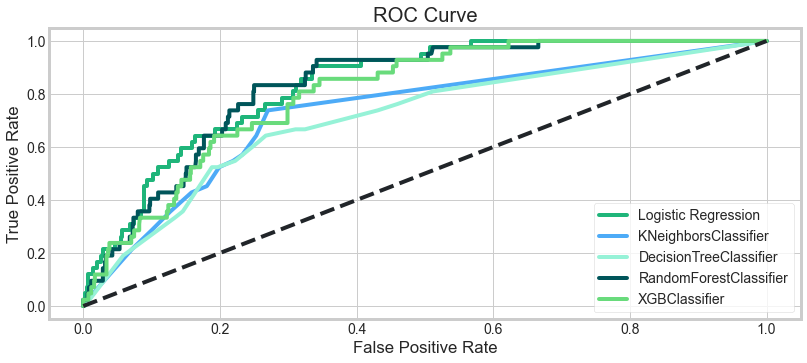

In [101]:
# ROC Curve for all models
fig = plt.figure(figsize=(12,5),facecolor='#ffffff')
fpr, tpr, _ = roc_curve(y_val, lr_final.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,color='#1fb57a')

fpr, tpr, _ = roc_curve(y_val, kn_final.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,color='#4DABF7')

fpr, tpr, _ = roc_curve(y_val, dt_final.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,color='#96F2D7')

fpr, tpr, _ = roc_curve(y_val, rf_final.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,color='#00555a')

fpr, tpr, _ = roc_curve(y_val, xgb_final.predict_proba(X_val)[:,1])
plt.plot(fpr, tpr,color='#69DB7C')

x = np.linspace(0,1, 100000)
plt.plot(x, x,color='#212529',linestyle='--')

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(['Logistic Regression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','XGBClassifier'])